In [2]:
# dependencies and setup

import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import scipy.stats as stats

In [3]:
# file path stored as a variable
file = "sdhousing_w_redfin_csv.csv"
coastal_file = "coastal_zips.csv"

In [4]:
# read the csvs in
sd_housing_df = pd.read_csv(file)
coastal_df = pd.read_csv(coastal_file)
# display to verify
sd_housing_df.head()

,zip,GEO_NAME,med_home_sale_1_12,med_home_sale_1_15,med_home_sale_1_18,pop_2011,pop_2014,pop_2017,med_hh_inc_11,med_hh_inc_14,...,total_units_17,ownocc_units_11,ownocc_units_14,ownocc_units_17,rent_units_11,rent_units_14,rent_units_17,median_gross_rent_11,median_gross_rent_14,median_gross_rent_17
0,91901,Alpine California,390.0,490.0,632.0,16606,18184,18238,77064,81379,...,17813,11259,12843,13642,4845,4939,4171,1274,1284,1397
1,91902,Bonita California,405.0,595.0,632.0,17399,19504,19762,78187,88926,...,19699,14192,15009,13997,3187,4447,5702,1462,1653,1777
2,91910,Chula Vista California,250.0,389.0,508.0,71887,76797,76250,56510,54640,...,75145,38566,37110,36004,32504,38753,39141,1137,1189,1298
3,91911,Chula Vista California,245.0,364.0,470.0,79518,83710,84025,48386,48891,...,83096,42313,41658,42151,36788,41399,40945,1154,1210,1359
4,91913,Chula Vista California,305.0,420.0,517.0,40633,43655,49346,89737,84741,...,49337,29091,31864,35928,11542,11786,13409,1831,1823,1947


In [5]:
# verify coastal data is in
coastal_df.head()

,zip,GEO_NAME,coastal
0,91910,Chula Vista California,y
1,91911,Chula Vista California,y
2,91932,Imperial Beach California,y
3,91950,National City California,y
4,92007,Cardiff By the Sea California,y


In [6]:
# check # of rows before edit
print(len(sd_housing_df))

87


In [7]:
# remove rows where med_hh_inc_11 = "-", this eliminates many other rows that lack data
sd_housing_df_clean1 = sd_housing_df[sd_housing_df.med_hh_inc_11 != "-"]
# reset the index
sd_housing_df_clean1 = sd_housing_df_clean1.reset_index(drop=True) 
# verify rows deleted
print(len(sd_housing_df_clean1))

81


In [8]:
# remove row where there is missing hh income in 2017, this also happens to be camp pendleton
sd_housing_df_clean2 = sd_housing_df_clean1[sd_housing_df_clean1.med_hh_inc_17 != "-"]
# verify row deleted
print(len(sd_housing_df_clean2))

80


Calculate 2011-2017 change in key metrics

In [9]:
# change in home price from 2011-2017
# note we are using January 2012, 2015 and 2018 data because Dec 2011 data wasn't available

# generate new dataframe to add change in median home sale price from 2012-2018
chg_in_home_price = pd.DataFrame(sd_housing_df_clean2, columns=["zip", "med_home_sale_1_12", "med_home_sale_1_15","med_home_sale_1_18"])

# add a column to hold the calculation
chg_in_home_price['home_price_chg'] = ""

# calculate change
chg_in_home_price['home_price_chg'] = (chg_in_home_price['med_home_sale_1_18']- \
                                       chg_in_home_price['med_home_sale_1_12'])/chg_in_home_price['med_home_sale_1_12']
# display new column, check values
chg_in_home_price.head()

,zip,med_home_sale_1_12,med_home_sale_1_15,med_home_sale_1_18,home_price_chg
0,91901,390.0,490.0,632.0,0.620513
1,91902,405.0,595.0,632.0,0.560494
2,91910,250.0,389.0,508.0,1.032000
3,91911,245.0,364.0,470.0,0.918367
4,91913,305.0,420.0,517.0,0.695082


In [10]:
# change in population from 2011-2017

# generate new dataframe 
chg_in_population = pd.DataFrame(sd_housing_df_clean2, columns=["zip", "pop_2011", "pop_2014", "pop_2017"])
# add a column to hold the calculation
chg_in_population['pop_chg'] = ""

# calculate change
chg_in_population['pop_chg'] = (chg_in_population['pop_2017']- \
                                       chg_in_population['pop_2011'])/chg_in_population['pop_2011']
# display new column, check values
chg_in_population.head()

,zip,pop_2011,pop_2014,pop_2017,pop_chg
0,91901,16606,18184,18238,0.098278
1,91902,17399,19504,19762,0.135812
2,91910,71887,76797,76250,0.060692
3,91911,79518,83710,84025,0.056679
4,91913,40633,43655,49346,0.214432


In [11]:
# change in median HH income from 2011-2017

# generate new dataframe 
chg_in_hh_income = pd.DataFrame(sd_housing_df_clean2, columns=["zip", "med_hh_inc_11", "med_hh_inc_14", "med_hh_inc_17"])

# change columns from string to value
chg_in_hh_income[["med_hh_inc_11", "med_hh_inc_14", "med_hh_inc_17"]] = chg_in_hh_income[["med_hh_inc_11", "med_hh_inc_14", "med_hh_inc_17"]].apply(pd.to_numeric)

# add a column to hold the calculation
chg_in_hh_income['hh_inc_chg'] = ""

# calculate change
chg_in_hh_income['hh_inc_chg'] = (chg_in_hh_income['med_hh_inc_17']- \
                                       chg_in_hh_income['med_hh_inc_11'])/chg_in_hh_income['med_hh_inc_11']
# display new column, check values
chg_in_hh_income.head()

,zip,med_hh_inc_11,med_hh_inc_14,med_hh_inc_17,hh_inc_chg
0,91901,77064,81379,90397,0.173012
1,91902,78187,88926,92759,0.186374
2,91910,56510,54640,59371,0.050628
3,91911,48386,48891,52274,0.080354
4,91913,89737,84741,87440,-0.025597


In [12]:
# change in total units from 2011-2017

# generate new dataframe, bring in total units & total rent units
chg_in_total_units = pd.DataFrame(sd_housing_df_clean2, columns=["zip", "total_units_11", \
                                                                 "total_units_14", "total_units_17", "rent_units_11", \
                                                                "rent_units_14", "rent_units_17"])
chg_in_total_units

# add a column to hold the calculations, capture raw change in total units and rental units
chg_in_total_units['raw_total_units_chg'] = ""
chg_in_total_units['raw_rental_units_chg'] = ""
chg_in_total_units['pct_chg_total_units'] = ""
chg_in_total_units['pct_chg_rental_units'] = ""

# calculate raw change for total units, add it to column
chg_in_total_units['raw_total_units_chg'] = (chg_in_total_units['total_units_17'] - chg_in_total_units['total_units_11'])

# calculate raw change for total rental units, add it to column
chg_in_total_units['raw_rental_units_chg'] = (chg_in_total_units['rent_units_17'] - chg_in_total_units['rent_units_11'])

# calculate % change for total units, add it to column
chg_in_total_units['pct_chg_total_units'] = (chg_in_total_units['total_units_17'] - \
                                             chg_in_total_units['total_units_11'])/chg_in_total_units['total_units_11']

# calculate raw change for total rental units, add it to column
chg_in_total_units['pct_chg_rental_units'] = (chg_in_total_units['rent_units_17'] - \
                                              chg_in_total_units['rent_units_11']) / chg_in_total_units['rent_units_11']

# display new column, check values
chg_in_total_units.head()

,zip,total_units_11,total_units_14,total_units_17,rent_units_11,rent_units_14,rent_units_17,raw_total_units_chg,raw_rental_units_chg,pct_chg_total_units,pct_chg_rental_units
0,91901,16104,17782,17813,4845,4939,4171,1709,-674,0.106123,-0.139112
1,91902,17379,19456,19699,3187,4447,5702,2320,2515,0.133494,0.789143
2,91910,71070,75863,75145,32504,38753,39141,4075,6637,0.057338,0.204190
3,91911,79101,83057,83096,36788,41399,40945,3995,4157,0.050505,0.112999
4,91913,40633,43650,49337,11542,11786,13409,8704,1867,0.214210,0.161757


In [13]:
# change in median gross rent from 2011-2017

# generate new dataframe 
chg_in_rent = pd.DataFrame(sd_housing_df_clean2, columns=["zip", "median_gross_rent_11", "median_gross_rent_14", \
                                                          "median_gross_rent_17"])
chg_in_rent

# change columns from string to value
chg_in_rent[["median_gross_rent_11", "median_gross_rent_14", \
             "median_gross_rent_17"]] = chg_in_rent[["median_gross_rent_11", \
                                                     "median_gross_rent_14", "median_gross_rent_17"]].apply(pd.to_numeric)

# add a column to hold the calculation
chg_in_rent['rent_chg'] = ""

# calculate change
chg_in_rent['rent_chg'] = (chg_in_rent['median_gross_rent_17']- \
                                       chg_in_rent['median_gross_rent_11'])/chg_in_rent['median_gross_rent_11']
# display new column, check values
chg_in_rent.head()


,zip,median_gross_rent_11,median_gross_rent_14,median_gross_rent_17,rent_chg
0,91901,1274,1284,1397,0.096546
1,91902,1462,1653,1777,0.215458
2,91910,1137,1189,1298,0.141601
3,91911,1154,1210,1359,0.177643
4,91913,1831,1823,1947,0.063353


Get summary stats

In [14]:
# build a dataframe with all cleaned data so we can calculate summary stats

# start off with chg_in_home_price
summ_stats = pd.DataFrame(chg_in_home_price)

# merge with chg_in_population
summ_stats = pd.merge(summ_stats, chg_in_population, on='zip', how='left')

# merge with chg_in_hh_income
summ_stats = pd.merge(summ_stats, chg_in_hh_income, on='zip', how='left')

# merge with chg_in_total_units
summ_stats = pd.merge(summ_stats, chg_in_total_units, on='zip', how='left')

# merge with chg_in_rent
summ_stats = pd.merge(summ_stats, chg_in_rent, on='zip', how='left')

summ_stats.head()

,zip,med_home_sale_1_12,med_home_sale_1_15,med_home_sale_1_18,home_price_chg,pop_2011,pop_2014,pop_2017,pop_chg,med_hh_inc_11,...,rent_units_14,rent_units_17,raw_total_units_chg,raw_rental_units_chg,pct_chg_total_units,pct_chg_rental_units,median_gross_rent_11,median_gross_rent_14,median_gross_rent_17,rent_chg
0,91901,390.0,490.0,632.0,0.620513,16606,18184,18238,0.098278,77064,...,4939,4171,1709,-674,0.106123,-0.139112,1274,1284,1397,0.096546
1,91902,405.0,595.0,632.0,0.560494,17399,19504,19762,0.135812,78187,...,4447,5702,2320,2515,0.133494,0.789143,1462,1653,1777,0.215458
2,91910,250.0,389.0,508.0,1.032000,71887,76797,76250,0.060692,56510,...,38753,39141,4075,6637,0.057338,0.204190,1137,1189,1298,0.141601
3,91911,245.0,364.0,470.0,0.918367,79518,83710,84025,0.056679,48386,...,41399,40945,3995,4157,0.050505,0.112999,1154,1210,1359,0.177643
4,91913,305.0,420.0,517.0,0.695082,40633,43655,49346,0.214432,89737,...,11786,13409,8704,1867,0.214210,0.161757,1831,1823,1947,0.063353


In [15]:
# calculate key rent stats

total_zips = summ_stats["zip"].nunique()
avg_med_rent_in_11 = summ_stats["median_gross_rent_11"].mean()
avg_med_rent_in_14 = summ_stats["median_gross_rent_14"].mean()
avg_med_rent_in_17 = summ_stats["median_gross_rent_17"].mean()
rent_chg_11_14 = ((avg_med_rent_in_14/avg_med_rent_in_11)-1)*100
rent_chg_14_17 = ((avg_med_rent_in_17/avg_med_rent_in_14)-1)*100
rent_chg_11_17 = ((avg_med_rent_in_17/avg_med_rent_in_11)-1)*100

print(f'Total zips in analysis: {total_zips}')
print("----------------------------------------------")
print(f'Average Median Rent in 2011: {avg_med_rent_in_11}')
print(f'Average Median Rent in 2014: {avg_med_rent_in_14}')
print(f'Average Median Rent in 2017: {avg_med_rent_in_17}')
print(f'Rent Change 11-14: {rent_chg_11_14}%')
print(f'Rent Change 14-17: {rent_chg_14_17}%')
print(f'Rent Change 11-17: {rent_chg_11_17}%')


Total zips in analysis: 80
----------------------------------------------
Average Median Rent in 2011: 1369.95
Average Median Rent in 2014: 1449.925
Average Median Rent in 2017: 1608.0375
Rent Change 11-14: 5.837804299426974%
Rent Change 14-17: 10.904874390054653%
Rent Change 11-17: 17.379283915471365%


In [16]:
# calculate key income stats:

avg_med_hhinc_in_11 = summ_stats["med_hh_inc_11"].mean()
avg_med_hhinc_in_14 = summ_stats["med_hh_inc_14"].mean()
avg_med_hhinc_in_17 = summ_stats["med_hh_inc_17"].mean()
hh_inc_chg_11_14 = ((avg_med_hhinc_in_14/avg_med_hhinc_in_11)-1)*100
hh_inc_chg_14_17 = ((avg_med_hhinc_in_17/avg_med_hhinc_in_14)-1)*100
hh_inc_chg_11_17 = ((avg_med_hhinc_in_17/avg_med_hhinc_in_11)-1)*100

print(f'Average Med HH Income 2011: {avg_med_hhinc_in_11}')
print(f'Average Med HH Income 2014: {avg_med_hhinc_in_14}')
print(f'Average Med HH Income 2017: {avg_med_hhinc_in_17}')
print(f'Med HH Inc Change 11-14: {hh_inc_chg_11_14}%')
print(f'Med HH Inc Change 14-17: {hh_inc_chg_14_17}%')
print(f'Med HH Inc Change 11-17: {hh_inc_chg_11_17}%')


Average Med HH Income 2011: 73287.05
Average Med HH Income 2014: 73327.35
Average Med HH Income 2017: 79922.3125
Med HH Inc Change 11-14: 0.05498925117057851%
Med HH Inc Change 14-17: 8.993864499398917%
Med HH Inc Change 11-17: 9.053799409309015%


In [17]:
# calculate key home value stats:

avg_med_homeprice_11 = summ_stats["med_home_sale_1_12"].mean()
avg_med_homeprice_14 = summ_stats["med_home_sale_1_15"].mean()
avg_med_homeprice_17 = summ_stats["med_home_sale_1_18"].mean()
homeprice_chg_11_14 = ((avg_med_homeprice_14/avg_med_homeprice_11)-1)*100
homeprice_chg_14_17 = ((avg_med_homeprice_17/avg_med_homeprice_14)-1)*100
homeprice_chg_11_17 = ((avg_med_homeprice_17/avg_med_homeprice_11)-1)*100

print(f'Average Med Home Price 2011 (1000s): {avg_med_homeprice_11}')
print(f'Average Med Home Price 2014 (1000s): {avg_med_homeprice_14}')
print(f'Average Med Home Price 2017 (1000s): {avg_med_homeprice_17}')
print(f'Change in Med Home Price 11-14: {homeprice_chg_11_14}%')
print(f'Change in Med Home Price 14-17: {homeprice_chg_14_17}%')
print(f'Change in Med Home Price 11-17: {homeprice_chg_11_17}%')


Average Med Home Price 2011 (1000s): 401.873417721519
Average Med Home Price 2014 (1000s): 565.5949367088608
Average Med Home Price 2017 (1000s): 678.5822784810126
Change in Med Home Price 11-14: 40.739574146402944%
Change in Med Home Price 14-17: 19.976724408039015%
Change in Med Home Price 11-17: 68.85473100667758%


Key findings:
- Median rent grew at a faster pace than median HH income over the period 2011-2014 and 2014-2017.
- The change in median home prices out-accelerated rent and HH income for both period 2011-2014 and 2014-2017.

Consolidate the 2011-2017 change values for our key % over the period change metrics

In [18]:
# combine the change data into one large result set, this is for the change from 2011 to 2017

# start with a clean dataframe, bring only zip from the cleaned df and then merge the change columns into it
chg_result_set = sd_housing_df_clean2[["zip"]]

# merge home price change into our new dataframe, only bring in home price change column
chg_result_set = pd.merge(chg_result_set, chg_in_home_price[['zip', 'home_price_chg']], on='zip', how='left')

# merge with change in population
chg_result_set = pd.merge(chg_result_set, chg_in_population[['zip', 'pop_chg']], on='zip', how='left')

# merge with change in HH income
chg_result_set = pd.merge(chg_result_set, chg_in_hh_income[['zip', 'hh_inc_chg']], on='zip', how='left')

# merge with change in % total units, % rental units
chg_result_set = pd.merge(chg_result_set, chg_in_total_units[['zip', 'pct_chg_total_units', 'pct_chg_rental_units']], \
                          on='zip', how='left')

# merge with change in gross median rent
chg_result_set = pd.merge(chg_result_set, chg_in_rent[['zip', 'rent_chg']], on='zip', how='left')

chg_result_set.head()

,zip,home_price_chg,pop_chg,hh_inc_chg,pct_chg_total_units,pct_chg_rental_units,rent_chg
0,91901,0.620513,0.098278,0.173012,0.106123,-0.139112,0.096546
1,91902,0.560494,0.135812,0.186374,0.133494,0.789143,0.215458
2,91910,1.032000,0.060692,0.050628,0.057338,0.204190,0.141601
3,91911,0.918367,0.056679,0.080354,0.050505,0.112999,0.177643
4,91913,0.695082,0.214432,-0.025597,0.214210,0.161757,0.063353


Investigate the data

In [19]:
# look at summary stats for each change variable

chg_result_set.describe()

,zip,home_price_chg,pop_chg,hh_inc_chg,pct_chg_total_units,pct_chg_rental_units,rent_chg
count,80.000000,79.000000,80.000000,80.000000,80.000000,80.000000,80.000000
mean,92053.525000,0.777717,0.097424,0.108244,0.101110,0.265201,0.175820
std,72.623701,0.299448,0.140383,0.110238,0.139598,0.801791,0.091961
min,91901.000000,-0.005425,-0.077095,-0.350321,-0.078262,-0.139112,-0.058000
25%,92010.750000,0.622521,0.041852,0.058520,0.044821,0.104556,0.121070
50%,92070.000000,0.746269,0.064453,0.122240,0.068651,0.149712,0.159510
75%,92114.250000,0.901980,0.115591,0.167346,0.120180,0.236854,0.207476
max,92173.000000,1.937931,1.129191,0.405625,1.129191,7.226190,0.558000


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000029B152676D8>]],
      dtype=object)

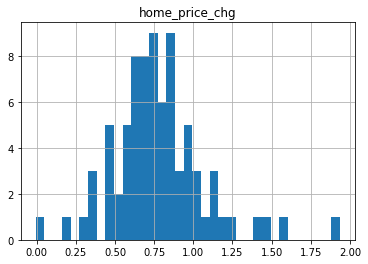

In [20]:
# histograms for each variable

# home price change histogram
chg_result_set.hist(column='home_price_chg', bins=35)


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000029B155EDEB8>]],
      dtype=object)

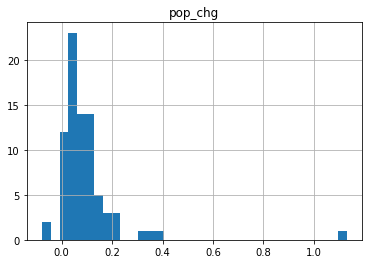

In [21]:
# population change histogram
chg_result_set.hist(column='pop_chg', bins=35)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000029B1666A940>]],
      dtype=object)

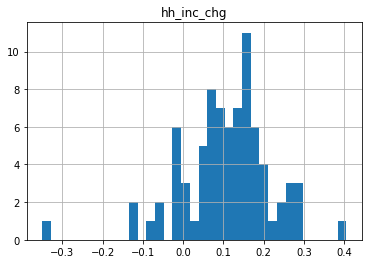

In [22]:
# hh income change histogram
chg_result_set.hist(column='hh_inc_chg', bins=35)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000029B16721828>]],
      dtype=object)

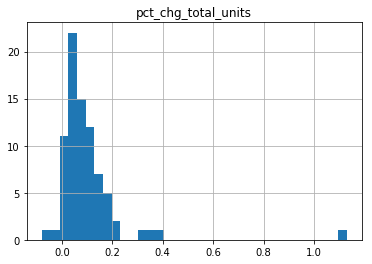

In [23]:
# % change in total units histogram
chg_result_set.hist(column='pct_chg_total_units', bins=35)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000029B1524E828>]],
      dtype=object)

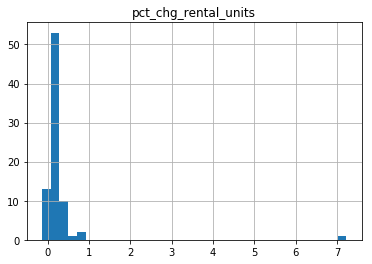

In [24]:
# % change in rental units histogram
chg_result_set.hist(column='pct_chg_rental_units', bins=35)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000029B1686BCF8>]],
      dtype=object)

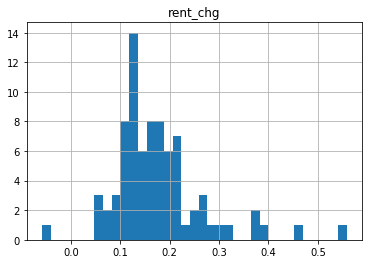

In [25]:
# histograms for each variable

# home price change histogram
chg_result_set.hist(column='rent_chg', bins=35)


Create blended histogram that shows how home price outpaced both rent and income

<Figure size 432x288 with 0 Axes>

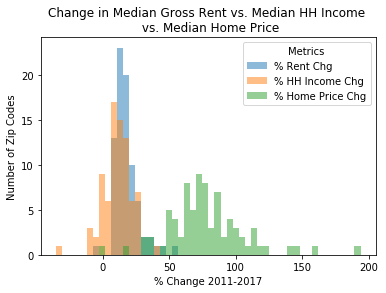

In [57]:
# create 3 distribution histogram to reveal how home prices outpaced rent and hh income
# create new dataframe to contrast the histograms of rent, income and home value

blended_histogram = pd.DataFrame(chg_result_set, columns=["rent_chg", "hh_inc_chg", "home_price_chg"])

# convert decimal values to whole integers for easier reading
blended_histogram.rent_chg *=100
blended_histogram.hh_inc_chg *=100
blended_histogram.home_price_chg *=100

# rename the columns to be less cryptic
blended_histogram.columns = ['% Rent Chg', '% HH Income Chg', '% Home Price Chg']

# plot it
plt.figure();
blended_histogram.plot.hist(alpha=0.5, bins=50)
plt.title('Change in Median Gross Rent vs. Median HH Income \n vs. Median Home Price')
plt.xlabel("% Change 2011-2017")
plt.ylabel("Number of Zip Codes")
plt.legend(title="Metrics")

Create blended histogram that shows how rent outpaced household income

<Figure size 432x288 with 0 Axes>

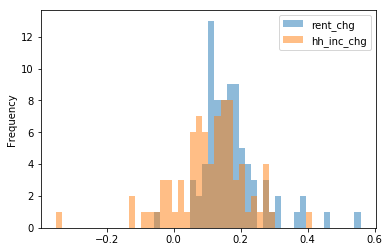

In [28]:
# create 2 distribution histogram to reveal how rent outpaced hh income
# create new dataframe to contrast the histograms of rent, income and home value

blended_histogram2 = pd.DataFrame(chg_result_set, columns=["rent_chg", "hh_inc_chg"])

plt.figure();
blended_histogram2.plot.hist(alpha=0.5, bins=50)

Create scatterplot of rent change vs hh income change

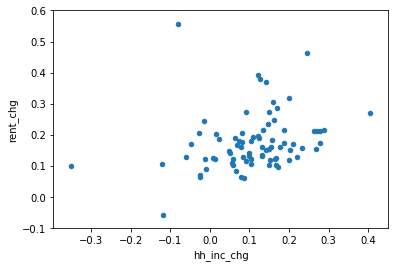

In [29]:
# create scatter plot of change in rent vs change in hh income (2011-2017)

ri_scatter = pd.DataFrame(chg_result_set, columns=["rent_chg", "hh_inc_chg"])
ri_scatter.plot.scatter(x='hh_inc_chg', y='rent_chg');

Create scatterplot of rent change vs home price change

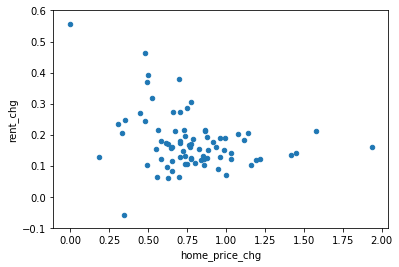

In [30]:
# create scatter plot of change in rent vs change in home price (2011-2017)

rhp_scatter = pd.DataFrame(chg_result_set, columns=["rent_chg", "home_price_chg"])
rhp_scatter.plot.scatter(x='home_price_chg', y='rent_chg');

Key findings:
- Zip codes with a higher rate of change in household income tend to also have higher changes in median rent
- However, this relationship changes when contrasted against median home price. The higher the change in home price the smaller the change in median rent. 

In [31]:
# look at correlations for each variable

chg_result_set.corr()

,zip,home_price_chg,pop_chg,hh_inc_chg,pct_chg_total_units,pct_chg_rental_units,rent_chg
zip,1.000000,0.168968,0.119214,0.018665,0.127043,0.127556,-0.085556
home_price_chg,0.168968,1.000000,-0.236553,0.016598,-0.238921,-0.312421,-0.293162
pop_chg,0.119214,-0.236553,1.000000,-0.368039,0.990151,0.879901,0.060048
hh_inc_chg,0.018665,0.016598,-0.368039,1.000000,-0.372443,-0.487010,0.254908
pct_chg_total_units,0.127043,-0.238921,0.990151,-0.372443,1.000000,0.881976,0.066201
pct_chg_rental_units,0.127556,-0.312421,0.879901,-0.487010,0.881976,1.000000,-0.047490
rent_chg,-0.085556,-0.293162,0.060048,0.254908,0.066201,-0.047490,1.000000


High level findings:

- The correlations here are fairly weak, however a few things can be noted:
- Higher levels of HH income change tend to be associated with less population growth (-.368), less units built (-.372), less rental units built (-.487) and higher rents (+.254). 
- The larger the home price increase, the lower the rent growth (-.293) and the lower growth of rental units (-.312).
- We will need to drill down to find more meaningful relationships:

Run correlations where rent change quartile = 1 or 4

In [32]:
# look at correlation by rent change quartile
# create new dataframe for this analysis

# generate new dataframe 
rent_chg_quartiles = pd.DataFrame(chg_result_set)

# bin based on quartiles
rent_chg_bins = [-0.058, .12107, .15951, .207476, .559]
rent_chg_labels = [1,2,3,4]
rent_chg_quartiles['QRT'] = pd.cut(rent_chg_quartiles['rent_chg'], bins=rent_chg_bins, labels=rent_chg_labels)
rent_chg_quartiles.head()


,zip,home_price_chg,pop_chg,hh_inc_chg,pct_chg_total_units,pct_chg_rental_units,rent_chg,QRT
0,91901,0.620513,0.098278,0.173012,0.106123,-0.139112,0.096546,1
1,91902,0.560494,0.135812,0.186374,0.133494,0.789143,0.215458,4
2,91910,1.032000,0.060692,0.050628,0.057338,0.204190,0.141601,2
3,91911,0.918367,0.056679,0.080354,0.050505,0.112999,0.177643,3
4,91913,0.695082,0.214432,-0.025597,0.214210,0.161757,0.063353,1


In [33]:
# create dataframe where rent change quartile = 1

rent_chg_q1 = rent_chg_quartiles[rent_chg_quartiles.QRT == 1]
rent_chg_q1.corr()

,zip,home_price_chg,pop_chg,hh_inc_chg,pct_chg_total_units,pct_chg_rental_units,rent_chg
zip,1.000000,0.170539,0.286435,-0.163731,0.298926,0.352031,0.275878
home_price_chg,0.170539,1.000000,-0.396279,0.067589,-0.369452,-0.075696,0.387389
pop_chg,0.286435,-0.396279,1.000000,-0.771780,0.998638,0.980133,-0.063403
hh_inc_chg,-0.163731,0.067589,-0.771780,1.000000,-0.771647,-0.772829,0.260022
pct_chg_total_units,0.298926,-0.369452,0.998638,-0.771647,1.000000,0.979399,-0.045717
pct_chg_rental_units,0.352031,-0.075696,0.980133,-0.772829,0.979399,1.000000,0.007457
rent_chg,0.275878,0.387389,-0.063403,0.260022,-0.045717,0.007457,1.000000


In [34]:
# create dataframe where rent change quartile = 4

rent_chg_q4 = rent_chg_quartiles[rent_chg_quartiles.QRT == 4]
rent_chg_q4.corr()

,zip,home_price_chg,pop_chg,hh_inc_chg,pct_chg_total_units,pct_chg_rental_units,rent_chg
zip,1.000000,0.240747,-0.240792,0.042194,-0.228950,-0.522984,-0.300868
home_price_chg,0.240747,1.000000,-0.495044,0.416153,-0.473180,-0.555745,-0.534690
pop_chg,-0.240792,-0.495044,1.000000,0.034559,0.993447,0.694438,0.398539
hh_inc_chg,0.042194,0.416153,0.034559,1.000000,0.013097,-0.275468,-0.460271
pct_chg_total_units,-0.228950,-0.473180,0.993447,0.013097,1.000000,0.690830,0.400046
pct_chg_rental_units,-0.522984,-0.555745,0.694438,-0.275468,0.690830,1.000000,0.355004
rent_chg,-0.300868,-0.534690,0.398539,-0.460271,0.400046,0.355004,1.000000


(0.05, 0.6)

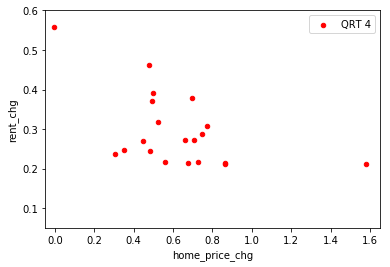

In [35]:
# create scatter plot of home_price_chg and rent_chg for rent change Quartile 4 (those with highest rent change)

rhp_rtchgq4 = pd.DataFrame(rent_chg_q4, columns=["rent_chg", "home_price_chg"])
rhp_rtchgq4.plot.scatter(x='home_price_chg', y='rent_chg', color='r', label='QRT 4');
# create same axis scales
plt.xlim(-.05,1.65)
plt.ylim(.05,.6)

(0.05, 0.6)

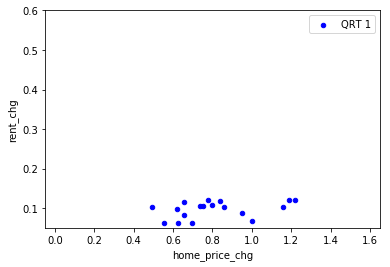

In [36]:
# create scatter plot of home_price_chg and rent_chg for rent change Quartile 1 (those with lowest rent change)

rhp_rtchgq1 = pd.DataFrame(rent_chg_q1, columns=["rent_chg", "home_price_chg"])
rhp_rtchgq1.plot.scatter(x='home_price_chg', y='rent_chg', color='b', label='QRT 1');
# create same axis scales
plt.xlim(-.05,1.65)
plt.ylim(.05,.6)

The above correlations are encouraging. 
In the zip codes that reported the highest rent change (quartile 4) the following observations were made:

- Higher changes in the home price were correlated with lower rent growth (-.5346), and vice-versa.
- Also, higher changes in the home price were also correlated with lower growth in rental units (-.555) and vice-versa.
- Higher changes in the home price were correlated with lower rates of population growth (-.495) and vice-versa.
- Higher changes in total units tended to correlated with higher rents. They build where they can get them.

In the zip codes that reported the lowest rent change (quartile 1), the following observations were made:
- Increases in the value of the home were correlated with higher rent growth (+.3873) - a flip-flop from above
- Higher changes in HH income were associated with lower rates of population change (-.771). Q4 has no correlation.
- Also higher changes in HH income were associated with low rates of housing unit growth (-.771) and rental unit growth (-.772)

Text(0, 0.5, '% Change in Median Home Price 2011-2017')

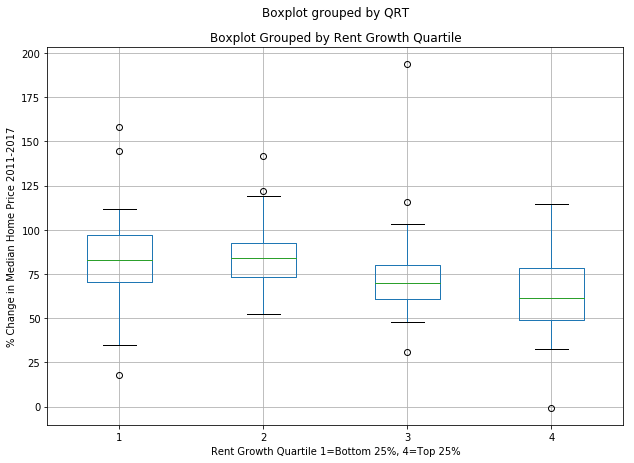

In [62]:
# create a boxplot based on the rent change quartiles, look at each variable (here is home_price_change)
# create a new dataframe for the plot
boxplot_df = rent_chg_quartiles

# modify the value of the y-axis for readability
boxplot_df.home_price_chg *=100

boxplot_df.boxplot("home_price_chg", by="QRT", figsize=(10,7))
plt.title('Boxplot Grouped by Rent Growth Quartile')
plt.xlabel("Rent Growth Quartile 1=Bottom 25%, 4=Top 25%")
plt.ylabel("% Change in Median Home Price 2011-2017")

In [38]:
# break files up into 4 different dataframes for easier coding
# we already have 'rent_chg_q1' and 'rent_chg_q4', all we need is q2 and q3

# for q3
rent_chg_q2 = rent_chg_quartiles[rent_chg_quartiles.QRT == 2]
rent_chg_q2

,zip,home_price_chg,pop_chg,hh_inc_chg,pct_chg_total_units,pct_chg_rental_units,rent_chg,QRT
2,91910,1.032000,0.060692,0.050628,0.057338,0.204190,0.141601,2
7,91932,1.448560,0.054433,0.098285,0.055507,0.060845,0.142214,2
11,91945,0.885593,0.064712,0.202467,0.072822,0.070490,0.149905,2
14,91978,0.962264,0.107992,-0.060252,0.106849,0.002302,0.128484,2
21,92014,0.583810,0.053626,0.014011,0.058309,0.317431,0.121196,2
32,92040,0.705882,0.078466,0.082683,0.075767,0.073484,0.129412,2
33,92054,0.736994,0.016928,0.099110,0.008609,-0.034707,0.131667,2
34,92056,0.774744,0.067290,0.008265,0.069428,0.206347,0.126498,2
39,92069,0.645963,0.095375,0.234169,0.095213,0.113592,0.157673,2
41,92075,0.180723,0.055533,0.220454,0.058248,0.089249,0.128571,2


In [39]:
# break files up into 4 different dataframes for easier coding
# we already have 'rent_chg_q1' and 'rent_chg_q4', all we need is q2 and q3

# for q3
rent_chg_q3 = rent_chg_quartiles[rent_chg_quartiles.QRT == 3]
rent_chg_q3

,zip,home_price_chg,pop_chg,hh_inc_chg,pct_chg_total_units,pct_chg_rental_units,rent_chg,QRT
3,91911,0.918367,0.056679,0.080354,0.050505,0.112999,0.177643,3
8,91935,0.328671,0.019077,-0.026328,0.019089,0.285202,0.206494,3
9,91941,0.701333,0.037214,0.104477,0.037223,0.188362,0.180805,3
10,91942,0.579310,0.050243,0.073798,0.051254,0.296772,0.181202,3
12,91950,1.115000,0.039715,0.158341,0.023433,0.059470,0.182618,3
18,92009,0.612000,0.121943,0.187012,0.119941,0.323715,0.174584,3
24,92021,0.785992,0.121930,0.023531,0.121839,0.316248,0.187617,3
26,92025,0.627119,0.115422,0.210987,0.113694,0.162743,0.170892,3
28,92027,0.758893,0.050768,0.069385,0.048267,0.210699,0.166519,3
31,92037,0.879195,-0.075459,0.109564,0.069970,0.107481,0.191542,3


Interpretation: Zip codes that were in the top 25% in 2011-2017 rent growth also saw the smallest median home price change.

In [40]:
# define the groups for the ANOVA test

# group 1 has a null in it, for the ANOVA I need to get rid of it
grp1 = rent_chg_q1["home_price_chg"]
grp1 = grp1.dropna()

# define the rest
grp2 = rent_chg_q2["home_price_chg"]
grp3 = rent_chg_q3["home_price_chg"]
grp4 = rent_chg_q4["home_price_chg"]

In [41]:
# perform the ANOVA
stats.f_oneway(grp1, grp2, grp3, grp4)

F_onewayResult(statistic=2.942216074204447, pvalue=0.03853052904691639)

The ANOVA F-value that I looked up is 3.13 for sample size 20 with 3 degrees of freedom.
The F-value I get is 2.94 which is below that but the p-value is below .05.
The F-value compares the joint effect of all the variables together. The small p-value means all my results are significant.
We can reject the null hypothesis because the alpha level is > the p-value. But it is close.

Run correlations where change in rental units quartile = 1 or 4

In [42]:
# look at correlation by rent units
# create new dataframe for this analysis

# generate new dataframe 
rent_unit_quartiles = pd.DataFrame(chg_result_set)

# bin based on quartiles
rent_unit_bins = [-.1392, .104556, .149712, .236854, 7.23]
rent_unit_labels = [1,2,3,4]
rent_unit_quartiles['QRT'] = pd.cut(rent_unit_quartiles['pct_chg_rental_units'], bins=rent_unit_bins, labels=rent_unit_labels)
rent_unit_quartiles.head()


,zip,home_price_chg,pop_chg,hh_inc_chg,pct_chg_total_units,pct_chg_rental_units,rent_chg,QRT
0,91901,0.620513,0.098278,0.173012,0.106123,-0.139112,0.096546,1
1,91902,0.560494,0.135812,0.186374,0.133494,0.789143,0.215458,4
2,91910,1.032000,0.060692,0.050628,0.057338,0.204190,0.141601,3
3,91911,0.918367,0.056679,0.080354,0.050505,0.112999,0.177643,2
4,91913,0.695082,0.214432,-0.025597,0.214210,0.161757,0.063353,3


In [43]:
# create dataframe where rent unit change quartile = 1

rent_unit_q1 = rent_unit_quartiles[rent_unit_quartiles.QRT == 1]
rent_unit_q1.corr()

,zip,home_price_chg,pop_chg,hh_inc_chg,pct_chg_total_units,pct_chg_rental_units,rent_chg
zip,1.000000,-0.147466,-0.096431,0.090881,-0.129067,0.264017,0.479301
home_price_chg,-0.147466,1.000000,-0.095220,-0.101958,-0.071153,0.079681,0.020524
pop_chg,-0.096431,-0.095220,1.000000,-0.078526,0.984742,0.097018,-0.146283
hh_inc_chg,0.090881,-0.101958,-0.078526,1.000000,-0.049393,-0.050236,0.372699
pct_chg_total_units,-0.129067,-0.071153,0.984742,-0.049393,1.000000,0.083563,-0.189609
pct_chg_rental_units,0.264017,0.079681,0.097018,-0.050236,0.083563,1.000000,-0.161995
rent_chg,0.479301,0.020524,-0.146283,0.372699,-0.189609,-0.161995,1.000000


In [44]:
# create dataframe where rent unit change quartile = 4

rent_unit_q4 = rent_unit_quartiles[rent_unit_quartiles.QRT == 4]
rent_unit_q4.corr()

,zip,home_price_chg,pop_chg,hh_inc_chg,pct_chg_total_units,pct_chg_rental_units,rent_chg
zip,1.000000,0.465991,0.247154,-0.162754,0.240482,0.236721,-0.403988
home_price_chg,0.465991,1.000000,-0.234363,0.213173,-0.278281,-0.441239,-0.419155
pop_chg,0.247154,-0.234363,1.000000,-0.417002,0.999325,0.914507,0.064348
hh_inc_chg,-0.162754,0.213173,-0.417002,1.000000,-0.425417,-0.605063,0.154451
pct_chg_total_units,0.240482,-0.278281,0.999325,-0.425417,1.000000,0.914378,0.075820
pct_chg_rental_units,0.236721,-0.441239,0.914507,-0.605063,0.914378,1.000000,-0.116096
rent_chg,-0.403988,-0.419155,0.064348,0.154451,0.075820,-0.116096,1.000000
